In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
import requests
from pywaffle import Waffle
import numpy as np
import squarify

%matplotlib inline

In [52]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#CE8986', '#452E2D', '#451A18', '#913733', '#C44A44']),
    'ps.fonttype': 42,
    'grid.linestyle': '--',
    'axes.facecolor': 'whitesmoke',
    'figure.facecolor': 'whitesmoke',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 'x-large',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 15.0,
    'legend.frameon' : False,
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'axes.titlesize': 30,
    'text.color': 'black'
    
})

In [3]:
df = pd.read_csv('refugees_with_datetime.csv')
df.head()

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident,year_clean,datetime
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018,2018-05-05
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018,2018-04-30
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018,2018-04-30
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018,2018-04-30
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018,2018-04-30


In [4]:
df.rename(columns={'cause of death': 'description'}, inplace=True)

In [5]:
df['suicide'] = df.description.str.contains('suicide|jumped out of a window|drowned himself')

In [67]:
df['drowned'] = df.description.str.contains('drown|drowned|off coast|sea|sunk|swim|shipwreck|capsized|sank|sinking boat|beach|went missing after boat sent SOS signal')

In [7]:
df['shot'] = df.description.str.contains('shot|shooting|gun')

In [8]:
df['turkish_border_guards'] = df.description.str.contains(r'Turkish border guards')

In [9]:
df.datetime = pd.to_datetime(df['datetime'], format="%Y/%m/%d")

In [10]:
df['stowaway'] = df.description.str.contains('stowaway')

In [11]:
df['claim_related'] = (df.description.str.contains('rejected|denied|deportation')) & (df.description.str.contains('asylum|application|residency'))

In [12]:
df['hospital'] = df.description.str.contains(' in hospital ') & (df.suicide == False) & (df.shot == False)

In [23]:
df['car_crash'] = (df.drowned == False) & (df.suicide == False) & (df.stowaway == False) & (df.shot == False) & (df.hospital == False) & (df.description.str.contains(' vehicle | truck |/bcar/b'))



In [14]:
df['police_related'] = (df.drowned == False) & (df.suicide == False) & (df.stowaway == False) & (df.shot == False) & (df.hospital == False) & (df.car_crash == False) & (df.description.str.contains('police'))



In [15]:
df['cause_of_death'] = 'blank'
df.head()

,found dead,number,"name, gender, age",region of origin,description,source,country of incident,year_clean,datetime,suicide,drowned,shot,turkish_border_guards,stowaway,claim_related,hospital,car_crash,police_related,cause_of_death
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018,2018-05-05,False,True,False,False,False,False,False,False,False,blank
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018,2018-04-30,False,False,False,False,False,False,False,False,False,blank
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018,2018-04-30,False,True,False,False,False,False,False,False,False,blank
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018,2018-04-30,False,False,False,False,False,False,False,False,False,blank
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018,2018-04-30,False,True,False,False,False,False,False,False,False,blank


In [68]:
def cause_of_death(row):
    if row['drowned'] == True:
        row['cause_of_death'] = 'drowned'
    elif row['suicide'] == True:
        row['cause_of_death'] = 'suicide'
    elif row['shot'] == True:
        row['cause_of_death'] = 'shot'
    elif row['stowaway'] == True:
        row['cause_of_death'] = 'stowaway'
    elif row['hospital'] == True:
        row['cause_of_death'] = 'hospital'
    elif row['car_crash'] == True:
        row['cause_of_death'] = 'car crash'
    elif row['police_related'] == True:
        row['cause_of_death'] = 'police'
    else:
        row['cause_of_death'] = 'other'
    return row

In [69]:
df = df.apply(cause_of_death, axis=1)

In [26]:
df.head()

,found dead,number,"name, gender, age",region of origin,description,source,country of incident,year_clean,datetime,suicide,drowned,shot,turkish_border_guards,stowaway,claim_related,hospital,car_crash,police_related,cause_of_death
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018,2018-05-05,False,True,False,False,False,False,False,False,False,drowned
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018,2018-04-30,False,False,False,False,False,False,False,False,False,other
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018,2018-04-30,False,True,False,False,False,False,False,False,False,drowned
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018,2018-04-30,False,False,False,False,False,False,False,False,False,other
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018,2018-04-30,False,True,False,False,False,False,False,False,False,drowned


In [27]:
df.groupby('cause_of_death').number.sum()

cause_of_death
car crash      236
drowned      27890
hospital        46
other         4966
police         136
shot           298
stowaway       443
suicide        346
Name: number, dtype: int64

In [47]:
new_pie_colors = ['#CE8986', '#452E2D', '#451A18', '#913733', '#C44A44']

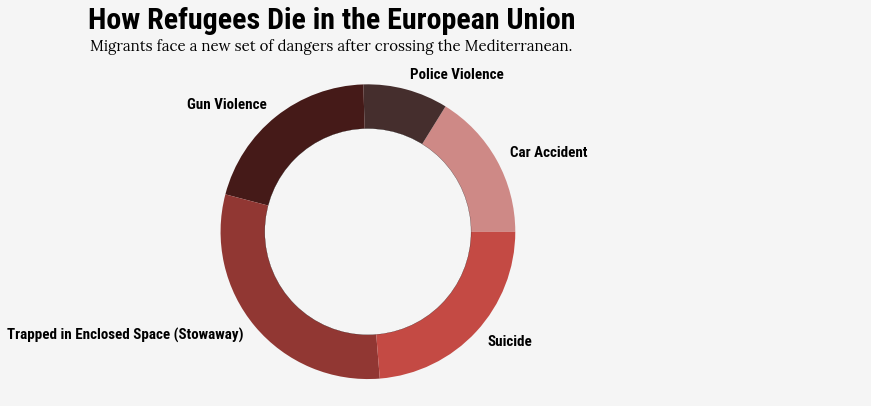

In [48]:
fig, ax = plt.subplots(facecolor='whitesmoke')

labels = ['Car Accident', 'Police Violence', 'Gun Violence', 'Trapped in Enclosed Space (Stowaway)', 'Suicide']

ax = df[(df.cause_of_death != 'drowned') & (df.cause_of_death != 'other') & (df.cause_of_death != 'hospital')].groupby('cause_of_death').number.sum().plot(kind='pie', colors=new_pie_colors, legend=False, figsize=(10, 6), labels=labels)
ax.legend('', bbox_to_anchor=(1.4,1))

ax.set_ylabel('')

ax.set_title("How Refugees Die in the European Union", pad=40, fontsize=30, loc='left', color='black')
ax.text(1.39, 1.23, "Migrants face a new set of dangers after crossing the Mediterranean.", ha='right', fontsize=15, fontdict={'family':'serif', 'color': 'black'})

centre_circle = plt.Circle((0,0),0.70, color='black', fc='whitesmoke', linewidth=0.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.savefig("how-refugees-die-final.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

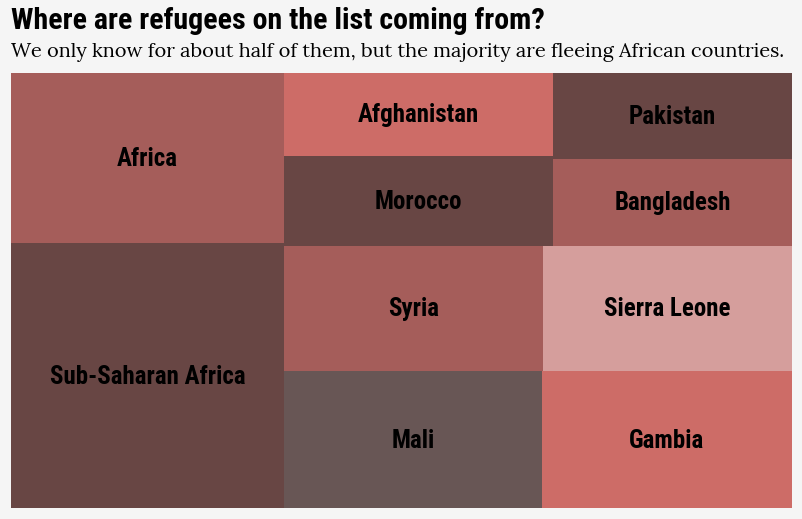

In [246]:
plt.rc('font', size=25)
box_colors = ['#CE8986', '#452E2D', '#451A18', '#913733', '#C44A44', '#451A18', '#CE8986', '#913733', '#C44A44', '#452E2D', '#913733', '#451A18']
box_colors = box_colors[::-1]
fig, ax = plt.subplots(facecolor='whitesmoke')

fig.set_size_inches(14,8)


plt.rcParams.update({'text.color': 'black'})

ax = squarify.plot(sizes=df_box.groupby('one_region').number.sum().sort_values(ascending=False).head(10), label=df_box.groupby('one_region').number.sum().sort_values(ascending=False).head(10).index, alpha=.8, color=box_colors)
#plt.axis('off')
#plt.show()

ax.grid(False)
ax.set_xticklabels(labels='')
ax.set_yticklabels(labels='')
ax.spines['left'].set_color('none')


ax.set_title('Where are refugees on the list coming from?', loc='left', pad=45, fontdict={'color': 'black'}, size=30)
ax.text(0,104, 'We only know for about half of them, but the majority are fleeing African countries.', fontdict={'color': 'black', 'family': 'serif'}, size=20)
plt.savefig("countries-of-origin-final.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("countries-of-origin-final.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')




In [486]:
df[df['region of origin'] != 'unknown'].groupby('region of origin').number.sum().sort_values(ascending=False).head(10)

region of origin
Sub-Saharan Africa              3486
Africa                          2983
Mali, Gambia, Sierra Leone       844
Morocco                          751
Eritrea, Nigeria, Sudan          715
North Africa                     606
Comoros                          562
Syria                            541
Ethiopia, Sud, Egy, Som, Syr     500
Palestine, Syria, Egypt, Sud     487
Name: number, dtype: int64

In [71]:
df_no_2018= df[df.year_clean != 2018]

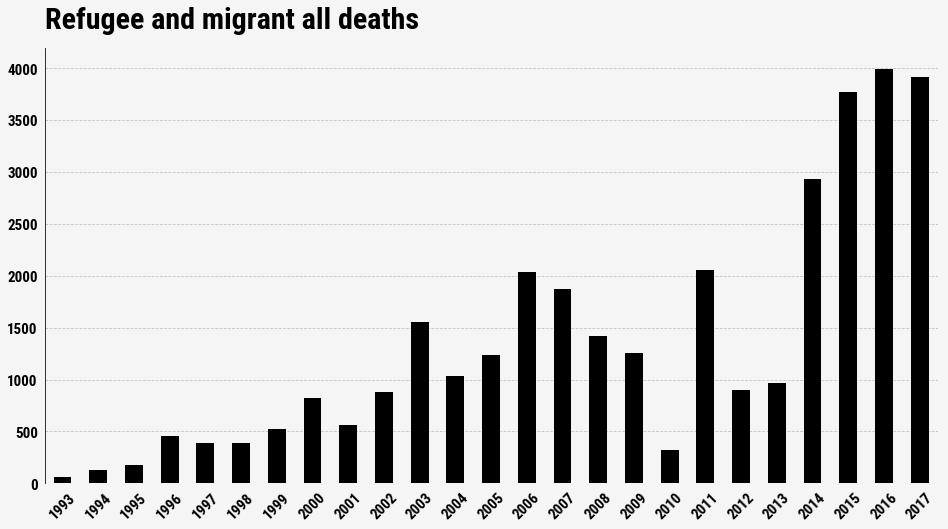

In [240]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df_no_2018.resample('A', on='datetime').number.sum().plot(kind='bar',figsize=(16,8), color='black')

ax.set_xlabel('')
xticklabels = [1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
ax.set_xticklabels(labels=xticklabels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.set_title('Refugee and migrant all deaths', color='black', loc='left', pad=20)
ax.spines['left'].set_color('black')
ax.grid(axis='y', color='silver')
ax.grid(axis='x', color='whitesmoke')

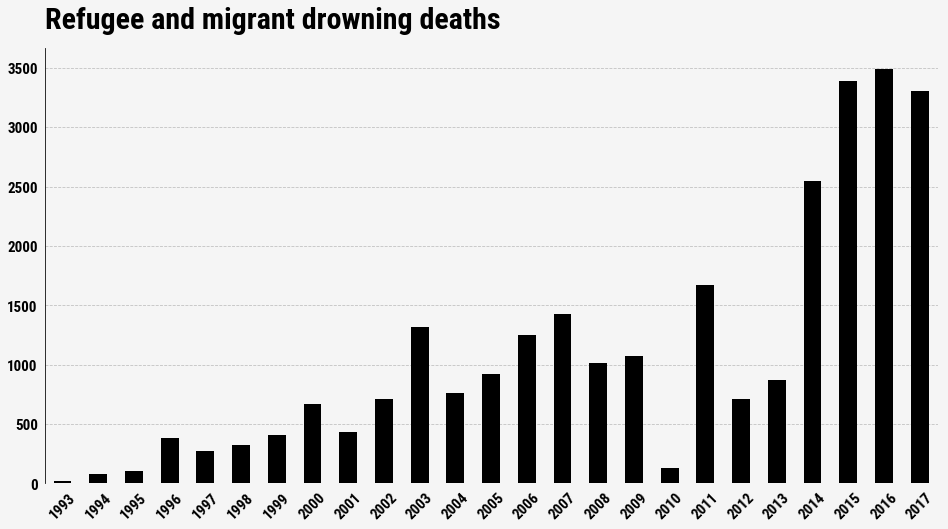

In [60]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df_no_2018[df_no_2018.drowned == True].resample('A', on='datetime').number.sum().plot(kind='bar',figsize=(16,8), color='black')

ax.set_xlabel('')
xticklabels = [1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
ax.set_xticklabels(labels=xticklabels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.set_title('Refugee and migrant drowning deaths', color='black', loc='left', pad=20)
ax.spines['left'].set_color('black')
ax.grid(axis='y', color='silver')
ax.grid(axis='x', color='whitesmoke')

plt.savefig("drownings-final.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("drownings-final.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')



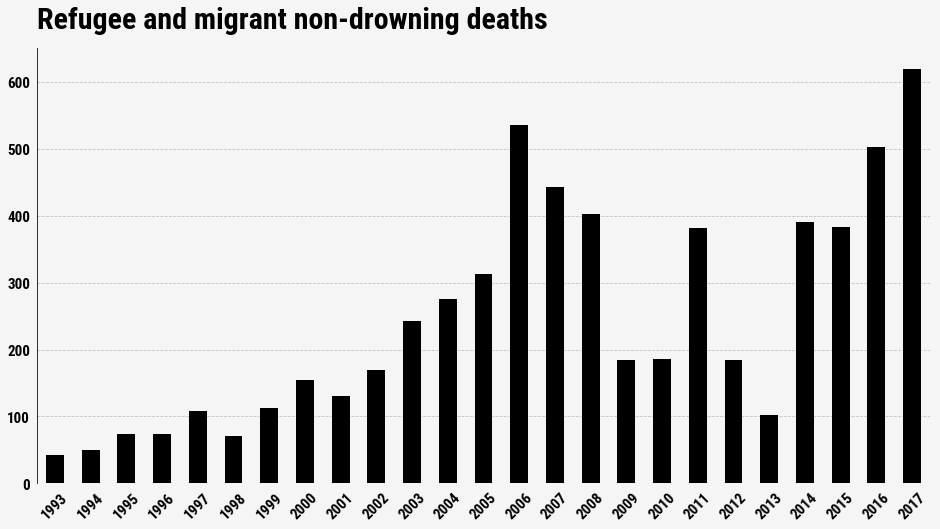

In [72]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df_no_2018[df_no_2018.drowned == False].resample('A', on='datetime').number.sum().plot(kind='bar',figsize=(16,8), color='black')

ax.set_xlabel('')
xticklabels = [1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
ax.set_xticklabels(labels=xticklabels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.set_title('Refugee and migrant non-drowning deaths', color='black', loc='left', pad=20)
ax.spines['left'].set_color('black')
ax.grid(axis='y', color='silver')
ax.grid(axis='x', color='whitesmoke')

plt.savefig("non-drownings-final.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("non-drownings-final.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


In [111]:
df_no_2018[(df_no_2018.drowned == False) & (df.year_clean == 2006)]

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,found dead,number,"name, gender, age",region of origin,description,source,country of incident,year_clean,datetime,suicide,drowned,shot,turkish_border_guards,stowaway,claim_related,hospital,car_crash,police_related,cause_of_death
1941,23/12/06,1,N.N.,Sub-Saharan Africa,stabbed by police in Rabat (MA) during operati...,APDHA/ICARE,Morocco,2006,2006-12-23,False,False,False,False,False,False,False,False,True,police
1942,20/12/06,24,N.N.,Sub-Saharan Africa,died of starvation on boat that wrecked in Yof...,Reu./WSWS,Senegal,2006,2006-12-20,False,False,False,False,False,False,False,False,False,other
1944,14/12/06,5,N.N.,Sub-Saharan Africa,"died trying to reach Canary Islands (ES), boat...",APDHA,Spain,2006,2006-12-14,False,False,False,False,False,False,False,False,False,other
1946,13/12/06,3,N.N.,unknown,died in hospital after boat wrecked near Dakar...,TmesM/IntHeraldTribune/USA Today/MNS/APDHA,Senegal,2006,2006-12-13,False,False,False,False,False,False,True,False,False,hospital
1949,09/12/06,1,"N.N. (man, 40)",Bulgaria,suicide while awaiting deportation in detentio...,LR/PR,Italy,2006,2006-12-09,True,False,False,False,False,False,False,False,False,suicide
1950,06/12/06,1,N.N.,unknown,"died of dehydration and hypothermia, found in ...",NOB/Gaymengc/FE/ELM/TS/MNS/APDHA,Spain,2006,2006-12-06,False,False,False,False,False,False,False,False,False,other
1951,06/12/06,1,N.N.,unknown,died of dehydration and hypothermia in hospita...,FE/ELM/MNS/APDHA/NOB/TySp/Gaymengc/TS,Spain,2006,2006-12-06,False,False,False,False,False,False,True,False,False,hospital
1953,03/12/06,1,N.N.,unknown,shot by Moroccan authorities while trying to c...,Eltelegramma/APDHA,Spain,2006,2006-12-03,False,False,True,False,False,False,False,False,False,shot
1954,02/12/06,1,N.N.,Sub-Saharan Africa,died of dehydration and hypothermia in hospita...,APDHA,Spain,2006,2006-12-02,False,False,False,False,False,False,True,False,False,hospital
1956,01/12/06,1,"Kazim Kustul (man, 22)",Turkey,"suicide, hanged himself in detention centre in...",INDm/Vatan/PR/MNS/LaDep,France,2006,2006-12-01,True,False,False,False,False,False,False,False,False,suicide


In [73]:
df_no_2018.to_csv('refugees-no-2018.csv', index=False)

In [104]:
df_no_2018.groupby('region of origin').number.sum().sort_values(ascending=False).head(15)

region of origin
unknown                         11469
Sub-Saharan Africa               3446
Africa                           2948
Mali, Gambia, Sierra Leone        844
Morocco                           750
Eritrea, Nigeria, Sudan           715
North Africa                      599
Comoros                           562
Syria                             541
Ethiopia, Sud, Egy, Som, Syr      500
Palestine, Syria, Egypt, Sud      487
Tunisia                           463
Somalia                           455
Albania                           393
Mali, Senegal, Gamb, Ivory C      329
Name: number, dtype: int64

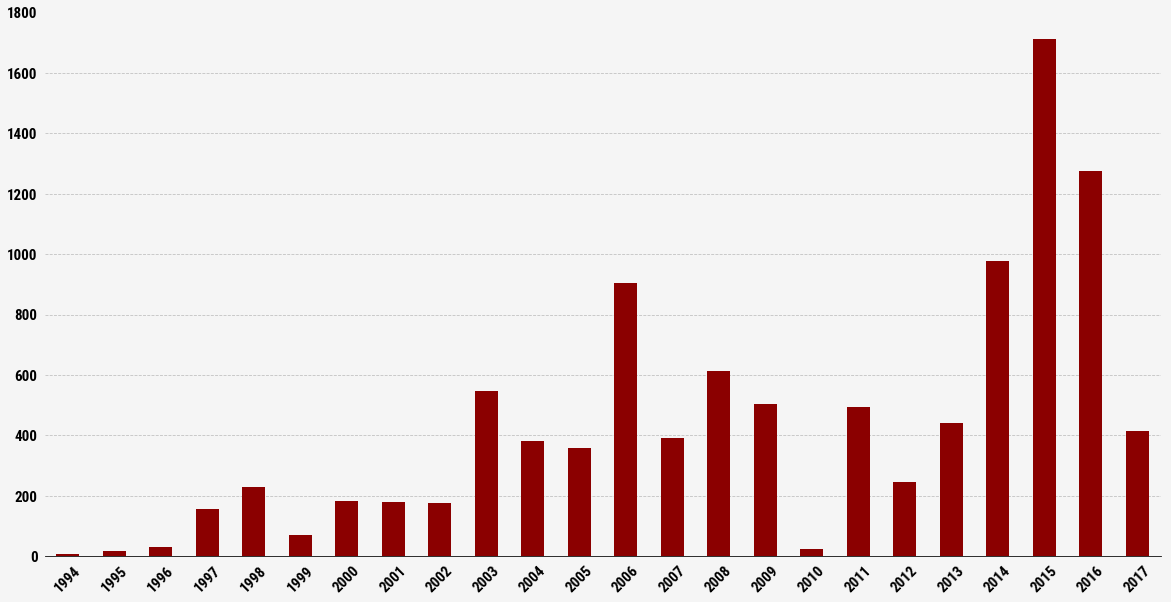

In [289]:
fig, ax = plt.subplots()
ax = df_no_2018[(df_no_2018['region of origin'] == 'Sub-Saharan Africa') | (df_no_2018['region of origin'] == 'Mali, Senegal, Gamb, Ivory C') | (df_no_2018['region of origin'] == 'Somalia') | (df_no_2018['region of origin'] == 'Tunisia') | (df_no_2018['region of origin'] == 'Ethiopia, Sud, Egy, Som, Syr') | (df_no_2018['region of origin'] == 'North Africa') | (df_no_2018['region of origin'] == 'Eritrea, Nigeria, Sudan ') | (df_no_2018['region of origin'] == 'Africa') | (df_no_2018['region of origin'] == 'Mali, Gambia, Sierra Leone') | (df_no_2018['region of origin'] == 'Morocco')].resample("A", on ='datetime').number.sum().plot(kind='bar',figsize=(20,10), color='darkred')

#ax.set_title('African migrant and refugee deaths on the way to Europe', loc='left', pad=20)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('')
ax.set_xlabel('')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.set_xticklabels(labels=[1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])

ax.grid(axis='x')

plt.savefig("african-deaths-final.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

In [294]:
africa = df_no_2018[(df_no_2018['region of origin'] == 'Sub-Saharan Africa') | (df_no_2018['region of origin'] == 'Mali, Senegal, Gamb, Ivory C') | (df_no_2018['region of origin'] == 'Somalia') |( df_no_2018['region of origin'] == 'Sudan') | (df_no_2018['region of origin'] == 'Tunisia') | (df_no_2018['region of origin'] == 'Ethiopia, Sud, Egy, Som, Syr') | (df_no_2018['region of origin'] == 'North Africa') | (df_no_2018['region of origin'] == 'Eritrea, Nigeria, Sudan ') | (df_no_2018['region of origin'] == 'Africa') | (df_no_2018['region of origin'] == 'Mali, Gambia, Sierra Leone') | (df_no_2018['region of origin'] == 'Morocco')]





In [309]:
africa[africa.year_clean == 2006].description.iloc[15]

'died on way to hospital after boat capsized near Malta'

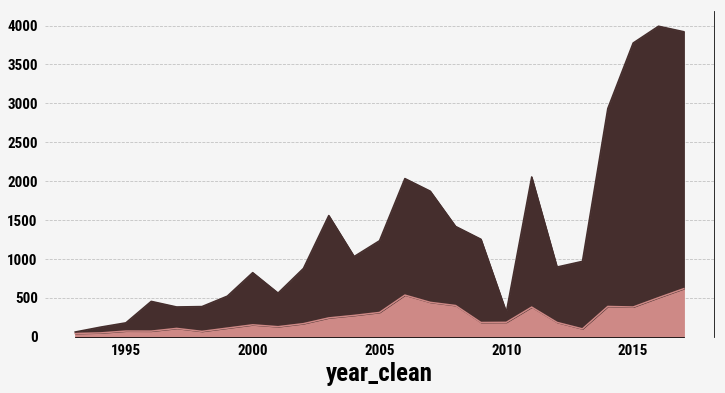

In [228]:
ax = df_no_2018.groupby(['year_clean', 'drowned']).number.sum().unstack().plot(kind='area', stacked=True, figsize=(12,6))
ax.spines['right'].set_color('black')
ax.spines['right'].set_visible(True)
#ax.spines['right'].set_position(('data', 2017))
ax.spines['right'].set_smart_bounds(0)


ax.spines['top'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['top'].set_smart_bounds(2)

ax.spines['left'].set_color('black')
ax.spines['left'].set_visible(False)
#ax.spines['left'].set_position(('data', 1993))

ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_smart_bounds(2)
ax.legend('')

ax.grid(axis='x')



plt.savefig("area-chart.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("area-chart.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


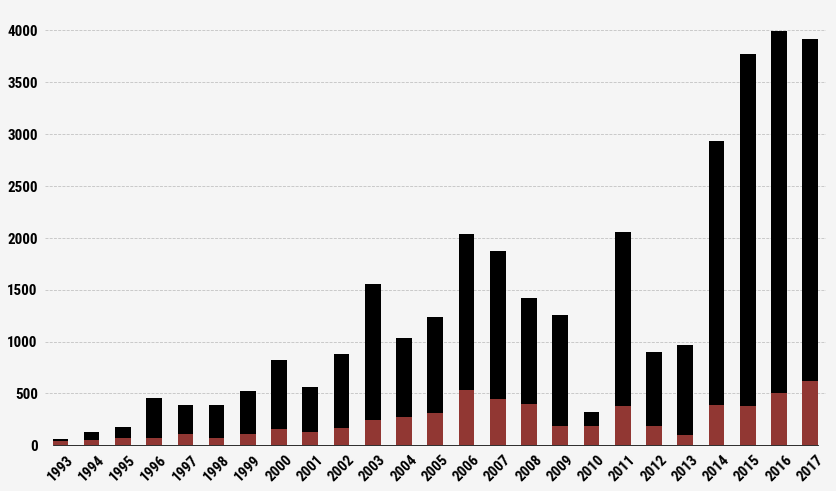

In [310]:
ax = df_no_2018.groupby(['year_clean', 'drowned']).number.sum().unstack().plot(kind='bar', stacked=True, figsize=(14,8), color=['#913733', 'black'])
ax.spines['right'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['right'].set_position(('axes', .99))
ax.spines['right'].set_smart_bounds(0)


ax.spines['top'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['top'].set_smart_bounds(2)

ax.spines['left'].set_color('black')
ax.spines['left'].set_visible(False)
#ax.spines['left'].set_position(('data', 1993))

ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_smart_bounds(2)
ax.legend('')

ax.grid(axis='x')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
ax.set_xlabel('')



plt.savefig("stacked-bars.png", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
plt.savefig("stacked-bars.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


In [262]:
df_no_2018.groupby(['year_clean', 'drowned']).number.sum().unstack().columns

Index([False, True], dtype='object', name='drowned')

In [166]:
ax.spines['left'].set_position?

Object `set_position` not found.


In [ ]:
ax.spines['left'].set_position

In [247]:
df.number.sum()

34361